In [1]:
import geopandas as gpd
from datetime import datetime

from metloom.pointdata import MesowestPointData

## READ THIS FOR MESOWEST DATA
https://metloom.readthedocs.io/en/latest/usage.html#mesowest
You'll also need to pip install metloom

In [2]:

# Import the function to get connect to the db
from snowexsql.db import get_db

# Import our class for the layer data
from snowexsql.data import PointData, SiteData

# Import a useful function to format that data into a dataframe
from snowexsql.conversions import query_to_geopandas

# Import some tools to build dates 
from datetime import date

# This is what you will use for all of hackweek to access the db
db_name = 'snow:hackweek@db.snowexdata.org/snowex'

In [3]:
engine, session = get_db(db_name)
qry = session.query(SiteData.site_name, SiteData.site_id, SiteData.geom)
qry = qry.filter(SiteData.site_name == "Grand Mesa")

gdf_snow_ex = query_to_geopandas(qry, engine) # .drop_duplicates(subset=["site_name"])
session.close()

print(f"The CRS of the Snow Ex metadata is - {gdf_snow_ex.crs}")
gdf_snow_ex_buffer = gdf_snow_ex.buffer(50000)
snow_ex_bounds = gdf_snow_ex.to_crs(4326).total_bounds


The CRS of the Snow Ex metadata is - epsg:26912


In [4]:
from shapely.geometry import box
def bounds_to_shapefile(bounds, file_name, crs):
    b = [box(*bounds)]
    gdf = gpd.GeoDataFrame(geometry=b).set_crs(crs)
    gdf.to_file(file_name)

In [18]:
# Specify some user inputs
start_date = datetime(2020, 2, 1)
end_date = datetime(2020, 3, 3)
shape_file_path = "gm_bounds.shp"

         minx       miny       maxx       maxy
0 -108.221439  39.007606 -108.00313  39.064291


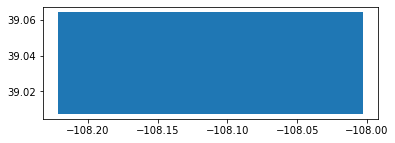

In [19]:
bounds_to_shapefile(snow_ex_bounds, shape_file_path, 4326)
df_shp = gpd.read_file(shape_file_path)
df_shp.plot()
print(df_shp.bounds)

In [20]:
# variables of interest
var_objs = [MesowestPointData.ALLOWED_VARIABLES.WINDSPEED, MesowestPointData.ALLOWED_VARIABLES.WINDDIRECTION
            ]
# read in the shape file
sf = gpd.read_file(shape_file_path)

# get a collection of points
points = MesowestPointData.points_from_geometry(
    sf, var_objs, within_geometry=False, buffer=0.1
)

# iterate through points and get hourly data
result_map = {}
for point in points:
    result = point.get_hourly_data(
        start_date, end_date, var_objs
    )
    if result is not None:
        result_map[point.id] = result
# print(result_map)

In [21]:
result_map.keys()

dict_keys(['D1827', 'CAGMS', 'GMSPC'])

In [22]:
df = result_map['D1827'][']

In [35]:
df.rename(columns={'WIND SPEED':'wspd', 'WIND DIRECTION':'wdir'}, inplace=True)

In [24]:
555/24

23.125

In [ ]:
def classify_winds(df, bins_wspd, bins_wdir=(np.arange()+22.5)%360):
    





In [46]:
import numpy as np
(np.arange(0, 360, 22.5)+11.25)%360


array([ 11.25,  33.75,  56.25,  78.75, 101.25, 123.75, 146.25, 168.75,
       191.25, 213.75, 236.25, 258.75, 281.25, 303.75, 326.25, 348.75])

In [52]:
import pandas as pd

wspds = np.arange(0, 10, 2)
wspd_labels = ['0-2','2-4','4-6','6-8','8-10']
wdirs = (np.arange(0, 360, 22.5)+11.25)%360
wdir_labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 
         'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

df['wspd_cat'] = pd.cut(df['wspd'], bins=5, labels=wspd_labels)
df['wdir_cat'] = pd.cut(df['wdir'], bins=)

In [51]:
test

datetime                   site 
2020-02-01 02:00:00+00:00  D1827    0-2
2020-02-01 07:00:00+00:00  D1827    0-2
2020-02-01 08:00:00+00:00  D1827    0-2
2020-02-01 09:00:00+00:00  D1827    0-2
2020-02-01 11:00:00+00:00  D1827    0-2
                                   ... 
2020-03-02 20:00:00+00:00  D1827    0-2
2020-03-02 21:00:00+00:00  D1827    2-4
2020-03-02 22:00:00+00:00  D1827    0-2
2020-03-02 23:00:00+00:00  D1827    0-2
2020-03-03 00:00:00+00:00  D1827    0-2
Name: wspd, Length: 555, dtype: category
Categories (5, object): ['0-2' < '2-4' < '4-6' < '6-8' < '8-10']